Import dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# data collection and processing

gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

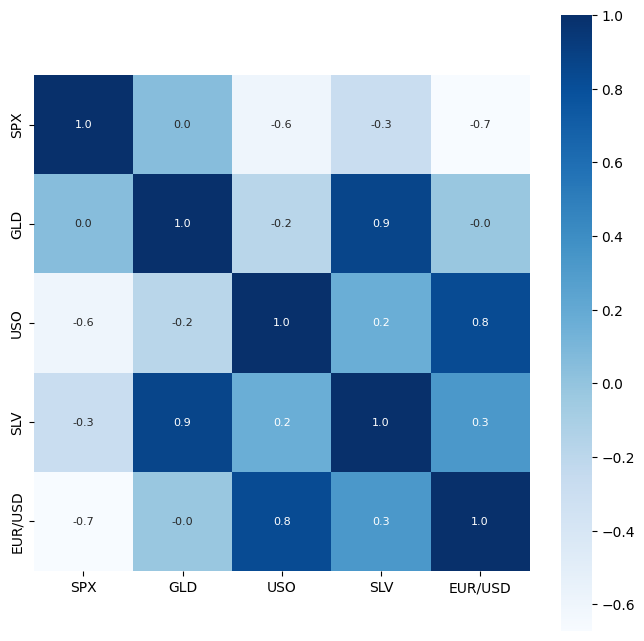

In [13]:
# correlation

correlation = gold_data.drop(columns=['Date']).corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},fmt='.1f',cmap='Blues')

In [14]:
# correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-15-1599364162.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

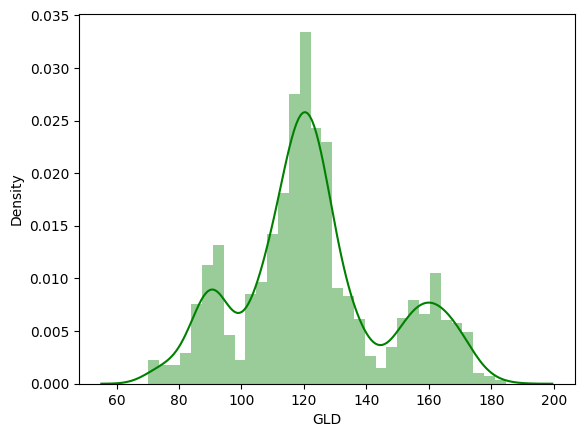

In [15]:
# checking the disrtibution of the gold price
sns.distplot(gold_data['GLD'],color='green')


splitting the features and the target


In [16]:
 X = gold_data.drop(['Date','GLD'],axis=1)
 Y = gold_data['GLD']

In [17]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitiing intp training and test data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=2)

In [19]:
print(X.shape, x_train.shape, x_test.shape)

(2290, 4) (1832, 4) (458, 4)


model training : Random forest Regressor

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
# training the model

regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
# prediction on test data

test_data_prediction = regressor.predict(x_test)

In [23]:
print(test_data_prediction)

[168.67009923  82.00479996 115.95189998 127.6568009  120.66290157
 154.76389787 149.97739788 125.99150093 117.59649874 125.97080074
 116.72420104 172.05940063 141.46759784 167.86569883 115.18300005
 117.96490077 137.65080276 170.30530111 159.4418042  158.13599856
 155.05900061 125.22420023 176.63519921 156.89810335 125.23080016
  94.04939963  77.54149991 120.69120003 119.11949935 167.51819962
  88.21590036 125.36810046  91.20710072 117.77240011 121.05189902
 135.88720052 115.60340088 115.88180069 147.47680023 107.26330103
 104.8501024   87.2586977  126.46350081 117.75370016 153.80399872
 119.69150029 108.38800015 108.09369803  93.11550027 126.98019841
  74.98670014 113.72039913 121.34800001 111.22559958 118.94699893
 120.94339879 159.3969993  167.67590102 147.12949704  85.75529857
  94.2365003   86.79259881  90.54250036 118.87520098 126.46020067
 127.36060033 168.45249936 122.27169952 117.53199905  98.66780065
 168.09910114 143.21529852 132.37920242 121.16040254 120.36619956
 119.49290

In [24]:
# R square error

error_score = metrics.r2_score(y_test,test_data_prediction)

print('R squared error :', error_score)

R squared error : 0.9889496463205113


comapre the actual values and predicted values in plot


In [25]:
y_test = list(y_test)

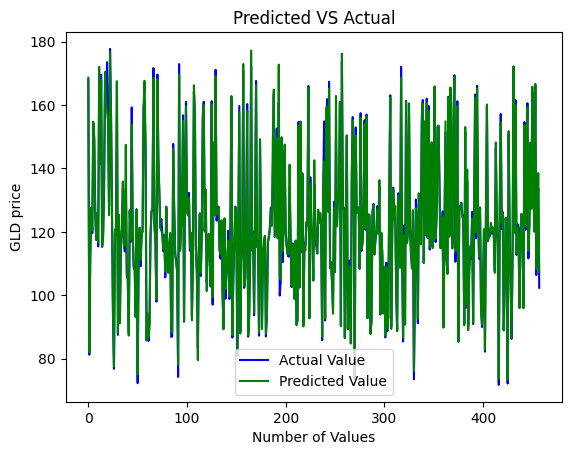

In [26]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Predicted VS Actual')
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()